<center><h1> Customer Churn Prediction

**`Course#`**   **DS5004**

**`Student#`**  **22k-5355**

<h1> Project Pipeline </h1>

**`Part 1`**
> - 1. **Introduction**
> - 2. **Exploring the Data**

**`Part 2`**
> - 3. **Data Visualization**
> - 4. **Data Cleaning**

**`Part 3`**
> - 5. **ML Models**
> - 6. **Test New Data to Final Model**

<h1>1. Introduction: </h1>

- Customer churn is a term used when a customer decides to stop using the services of the business.
- We need to use the available data to train machine learning model of high accuracy that will predict which customers are about to churn

<h2>Importing the libraries: </h2>

The first step is to import the necessary libraries

In [1]:
# for manupilating data
import pandas as pd
import numpy as np

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.linear_model import  LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from prettytable import PrettyTable

<h2> Loading the data: </h2>

The next step is to load the sample dataset into a pandas DataFrame. We can use panda's **read_csv()** function to load the data into a DataFrame.

In [2]:
url = 'https://github.com/kawish14/User-Manaul/raw/main/churn_data.csv'
data = pd.read_csv(url)

<h2> 2. Exploring the data: </h2>

Before creating any visualizations, it is important to explore the data and understand its structure and distribution

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.shape

(7043, 21)

> There are 7,043 rows and 21 columns in the dataset.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


> **Let's talk about each column and it's content.**
> - **`customerID`**: Simply, the id for each customer.
> - **`gender`**: Whether the customer is a male or a female.
> - **`SeniorCitizen`**: Whether the customer is a senior citizen or not (1, 0).
> - **`Partner`**: Whether the customer has a partner or not (Yes, No).
> - **`Dependnts`** : Whether the customer is dependents or not (Yes, No).
> - **`tenure`** : Number of months the customer has stayed with the company.
> - **`PhoneService`** : Whether the customer has a phone service or not (Yes, No).
> - **`MultipleLines`** : Whether the customer has multiple lines or not (Yes, No, No phone service).
> - **`InternetService`** : Customer’s internet service provider (DSL, Fiber optic, No).
> - **`OnlineSecurity`** : Whether the customer has online security or not (Yes, No, No internet service).
> - **`OnlineBackup`** : Whether the customer has online backup or not (Yes, No, No internet service).
> - **`DeviceProtection`** : Whether the customer has device protection or not (Yes, No, No internet service).
> - **`TechSupport`** : Whether the customer has tech support or not (Yes, No, No internet service).
> - **`StreamingTV`** : Whether the customer has streaming TV or not (Yes, No, No internet service).
> - **`StreamingMovies`** : Whether the customer has streaming movies or not (Yes, No, No internet service).
> - **`Contract`** : The contract term of the customer (Month-to-month, One year, Two year).
> - **`PaperlessBilling`** : Whether the customer has paperless billing or not (Yes, No).
> - **`PaymentMethod`** : The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)).
> - **`MonthlyCharges`** : The amount charged to the customer monthly.
> - **`TotalCharges`** : The total amount charged to the customer.
> - **`churn`** : Whether the customer churned or not (Yes or No).

> **Notes:**
> - **`No Null`** values in the data.
> - **`SeniorCitizen`** is of type **`int64`** and it should be a **`category`** column.
> - **`TotalCharges`** is of type **`object`** and it's a **`numeric`** column.
> - Many columns need to be converted to **`category`** type.
> - **`customerID`** won't be useful. I will drop it.

<h3>2.1. Getting Info of dataset such as non null and data types

In [6]:
# let's see what is making TotalCharges object column
for i in range(len(data["TotalCharges"])):
    val = data["TotalCharges"][i]
    try:
        float(val)
    except:
        print(f"Row {i} has a value of TotalCharges = {val}")

Row 488 has a value of TotalCharges =  
Row 753 has a value of TotalCharges =  
Row 936 has a value of TotalCharges =  
Row 1082 has a value of TotalCharges =  
Row 1340 has a value of TotalCharges =  
Row 3331 has a value of TotalCharges =  
Row 3826 has a value of TotalCharges =  
Row 4380 has a value of TotalCharges =  
Row 5218 has a value of TotalCharges =  
Row 6670 has a value of TotalCharges =  
Row 6754 has a value of TotalCharges =  


> Here **`""`**  only an **empty string**.<br>
> We can convert it to **null value**. We have **11** of those little demons.

Let's convert empty string into null values in **`TotalCharges`** column

In [7]:
# applying pd.to_numeric() while making errors = "coerce" will automatically convert strings to nulll values.
data["TotalCharges"] = pd.to_numeric(data["TotalCharges"], errors = "coerce")

In [8]:
# Let's see the null values
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

> 11 is a small number, so we will drop them.

In [9]:
# Remove null values from TotalCharges
data = data.dropna(subset=['TotalCharges'])

Now check the duplication in data

In [10]:
data.duplicated().sum()

0

<h3> 2.2. Data type Conversion

In [11]:
# First convert SeniorCitizen to category
data["SeniorCitizen"] = data["SeniorCitizen"].astype("category")

#check
assert data["SeniorCitizen"].dtype == "category"

Convert all other necessary columns to category

In [12]:
# convert columns to categoris
cat_col = ["gender", "Partner", "Dependents", "PhoneService", "MultipleLines", "InternetService", "OnlineSecurity",
               "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "Contract",
               "PaperlessBilling", "PaymentMethod", "Churn"]

In [13]:
for col in cat_col:
    data[col] = data[col].astype("category")

In [14]:
# final check
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7032 non-null   object  
 1   gender            7032 non-null   category
 2   SeniorCitizen     7032 non-null   category
 3   Partner           7032 non-null   category
 4   Dependents        7032 non-null   category
 5   tenure            7032 non-null   int64   
 6   PhoneService      7032 non-null   category
 7   MultipleLines     7032 non-null   category
 8   InternetService   7032 non-null   category
 9   OnlineSecurity    7032 non-null   category
 10  OnlineBackup      7032 non-null   category
 11  DeviceProtection  7032 non-null   category
 12  TechSupport       7032 non-null   category
 13  StreamingTV       7032 non-null   category
 14  StreamingMovies   7032 non-null   category
 15  Contract          7032 non-null   category
 16  PaperlessBilling  7032 n

<h3> 2.3. Data Description

**`Categorical Column`**

In [15]:
data.describe(include = "category")

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3549,5890,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,5163


> all columns has same count of unique values as expected

Let's see the unique value of each categorical column

In [16]:
print(" Column name ", end =" "*(12 - len(col)) + "\t\t")
print(" Unique values ", end = "")
print("\n" + ("-"*50))
for col in cat_col:
    print(f"{col}:", end =" "*(16 - len(col)) + "\t\t")
    unique = data[col].unique()
    for val in unique:
        print(f"{val}", end = " - ")
    print("\n" + ("-"*125))

 Column name        		 Unique values 
--------------------------------------------------
gender:          		Female - Male - 
-----------------------------------------------------------------------------------------------------------------------------
Partner:         		Yes - No - 
-----------------------------------------------------------------------------------------------------------------------------
Dependents:      		No - Yes - 
-----------------------------------------------------------------------------------------------------------------------------
PhoneService:    		No - Yes - 
-----------------------------------------------------------------------------------------------------------------------------
MultipleLines:   		No phone service - No - Yes - 
-----------------------------------------------------------------------------------------------------------------------------
InternetService: 		DSL - Fiber optic - No - 
---------------------------------------------------------

> We will need a lot of **`encoding`**. we will done it in cleaning stage

Now convert **`target`** feature to numeric type and replace **`Yes`** with **`1`** and **`No`** with **`0`**

In [17]:
data["Churn"].replace({"Yes": 1, "No": 0}, inplace = True)
#data["Churn"] = pd.to_numeric(data["Churn"])

#assert data["Churn"].dtype == "int64"

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7032 non-null   object  
 1   gender            7032 non-null   category
 2   SeniorCitizen     7032 non-null   category
 3   Partner           7032 non-null   category
 4   Dependents        7032 non-null   category
 5   tenure            7032 non-null   int64   
 6   PhoneService      7032 non-null   category
 7   MultipleLines     7032 non-null   category
 8   InternetService   7032 non-null   category
 9   OnlineSecurity    7032 non-null   category
 10  OnlineBackup      7032 non-null   category
 11  DeviceProtection  7032 non-null   category
 12  TechSupport       7032 non-null   category
 13  StreamingTV       7032 non-null   category
 14  StreamingMovies   7032 non-null   category
 15  Contract          7032 non-null   category
 16  PaperlessBilling  7032 n

**`Numeric Column`**

In [19]:
data.describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


<h2> 3. Data Visualization: </h2>

<h4>3.1 Data Balance or Imbalance </h4>

Explore the data whether balance or imbalance

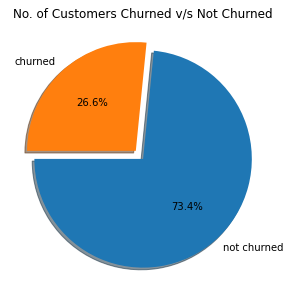

In [20]:
class_counts = data['Churn'].value_counts()
fig = plt.figure(figsize=(5,5)) 
plt.pie(class_counts, labels=['not churned','churned'],explode=(0,0.1),shadow=True, autopct="%1.1f%%", startangle=180)
plt.title('No. of Customers Churned v/s Not Churned')
plt.show()

> **Insights:**
> - Many people tend **`not to churn`**.
> - Our data is **`imbalanced`**.

<h4>3.2 Correlation of Numerical Variables</h4>

Let's check the correlation 

<AxesSubplot:>

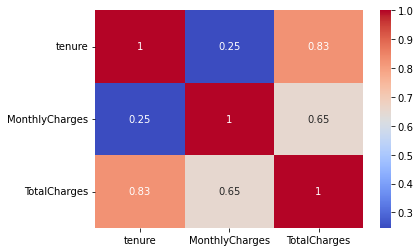

In [21]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

<h4>3.3 Distribution of Numerical Features</h4>

We will have a quick look at **`distributions`** of our columns.

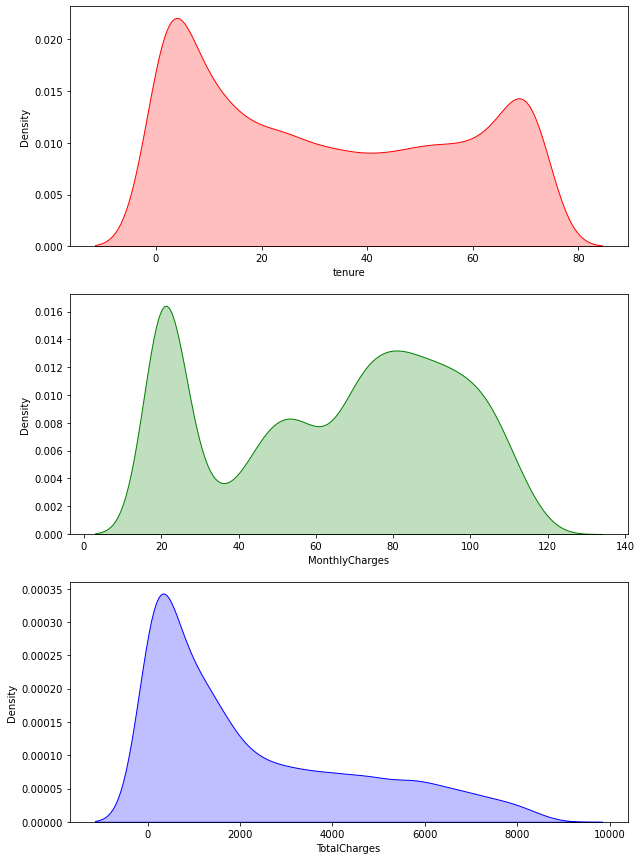

In [22]:
fig, ax = plt.subplots(3, figsize = (10, 15))
num_cols = ["tenure", "MonthlyCharges", "TotalCharges"]
colors = ["red", "green", "blue"]
for i, (col, color) in enumerate(zip(num_cols, colors)):
    sns.kdeplot(data = data, x = col, ax = ax[i], fill = True, color = color)

> **Insights:**
>- > **`tenure`**
>  >- It's a **bimodal** distribution.
>  >- This says that **most** of customers either stay for **short time** with the company or stays for **a long period**.
>- > **`MonthlyCharges`**
>  >- This is also a **bimodal** distribution.
>- > **`TotalCharges`**
>  >- The distribution is **right skewed**.
>  >- It has a very **different scale** that the other two columns.

<h4> 3.4 Outliers </h4>

Now draw the box plot to see the outliers

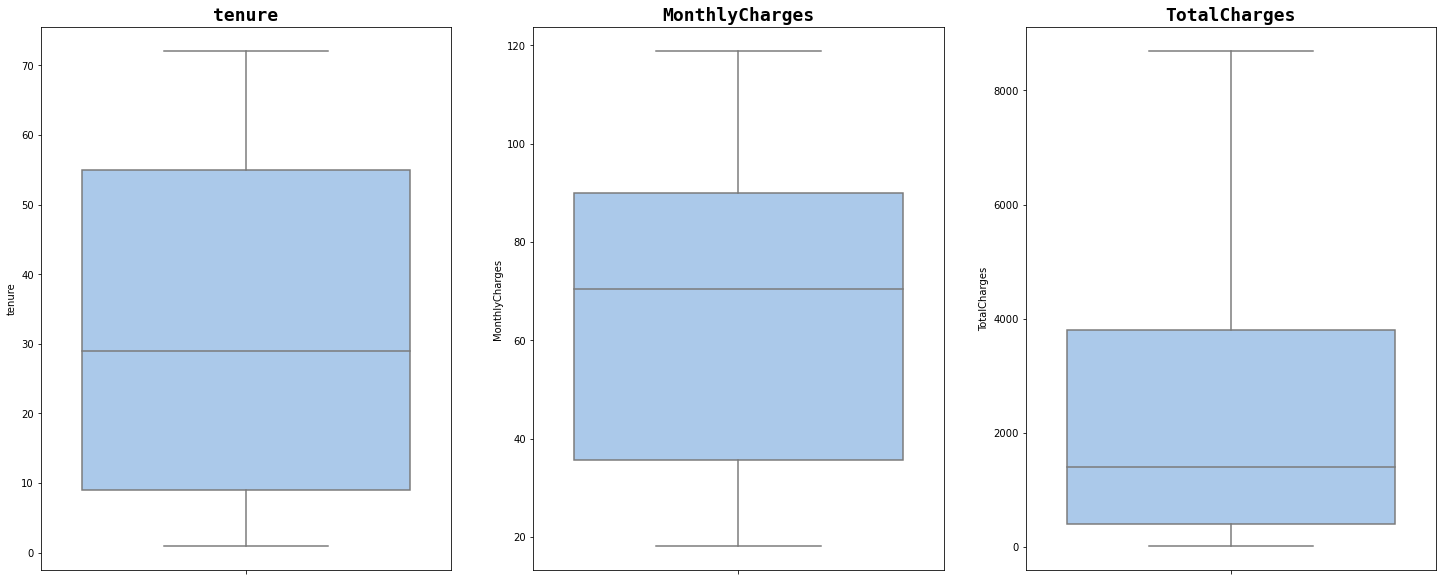

In [24]:
fig, ax = plt.subplots(1, 3, figsize = (25, 10))
for i,col in enumerate(num_cols):
    g = sns.boxplot(data = data, y = col, ax = ax[i], palette = "pastel")
    g.set_title(col, weight = "bold", fontsize = 18, fontname = "monospace")

<h2> 4. Data Cleaning: </h2>

Customer Id is useless so we will drop it

In [25]:
data.drop("customerID", axis=1, inplace=True)

Let's split data into test and train set

In [26]:
train, test= train_test_split(data, test_size = 0.3, random_state = 42) # 30% test set
print(f'training data size {train.shape}')
print(f'testing data size {test.shape}')

training data size (4922, 20)
testing data size (2110, 20)


Now split train set to **`features`** and **`target`** and do the same for test set.

In [27]:
X_train = train.drop("Churn", axis = 1) # drop target from x train
y_train = train["Churn"] 

X_test = test.drop("Churn", axis = 1) # drop target from x test
y_test = test["Churn"]

print(f'X_train data size {X_train.shape}')
print(f'y_train data size {y_train.shape} \n')

print(f'X_test data size {X_test.shape}')
print(f'y_test data size {y_test.shape} \n')

X_train data size (4922, 19)
y_train data size (4922,) 

X_test data size (2110, 19)
y_test data size (2110,) 



<h4> Encoding

In [29]:
encoder = OneHotEncoder()

<h4> Imputing

We know that we have **dropped** **`null values`**, but in case we had null values during **`evaluation`**.<br>
So, We will make imputer for **categorical** columns with the **`mode`** and for **numerical** columns with the **`median`**. 

In [30]:
cat_imputer = SimpleImputer(strategy = "most_frequent")
num_imputer = SimpleImputer(strategy = "median")

In [31]:
cat = Pipeline([
    ("cat_imputer", cat_imputer),
    ("end", encoder)
])

num = Pipeline([
    ("num_imputer", num_imputer),
    ("scaler", StandardScaler()),
])

In [44]:
cat_columns = ["gender", "Partner", "Dependents", "PhoneService", "MultipleLines", "InternetService", "OnlineSecurity", 
               "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "Contract",
               "PaperlessBilling", "PaymentMethod"]
num_columns = ["tenure", "MonthlyCharges","TotalCharges"]

In [114]:
cleaning = ColumnTransformer([
    ("num", num, num_columns),
    ("cat", cat, cat_columns),
], remainder = "passthrough")
X_train_final = cleaning.fit_transform(X_train)
X_test_final = cleaning.fit_transform(X_test)

print('Training Dataset',X_train_final.shape)
print('Testing Dataset', X_test_final.shape)

Training Dataset (4922, 45)
Testing Dataset (2110, 45)


<h2> 5. Apply Models </h2>

In [33]:
models_data = list()
best_model = list()

In [34]:
# helpful class to automate a lot of work that we are going to do.
class Classifier:
    def __init__(self, model, x, y,x_test,y_test, balancing):
        self.x = x
        self.y = y
        self.x_test = x_test
        self.y_test = y_test
        self.model = model
        self.balancing = balancing
    
    def algorithm(self):
        parameters = {'C' : np.logspace(-4, 4, 20)}
        parameters_DT = {'max_depth': [None, 5, 10, 20,30,50], 'min_samples_split': [2, 5, 10,15,20]}
        
        if self.model.__class__.__name__ == 'DecisionTreeClassifier':
            grid_dt = GridSearchCV(estimator=self.model, param_grid=parameters_DT,cv=5,scoring='accuracy',return_train_score=True,verbose=1)
            grid_dt.fit(self.x,self.y)
            print()
            print(self.model.__class__.__name__)
            print("-----"*20)
            print("Best Parameter", grid_dt.best_params_)
            cv_result = pd.DataFrame(grid_dt.cv_results_)

            plt.scatter(cv_result['param_max_depth'], cv_result['mean_train_score'])
            plt.plot(cv_result['param_max_depth'], cv_result['mean_train_score'], label='Train')

            plt.scatter(cv_result['param_max_depth'], cv_result['mean_test_score'])
            plt.plot(cv_result['param_max_depth'], cv_result['mean_test_score'], label="CV")

            plt.title('Hyperparameter vs accuracy')
            plt.legend()
            plt.xlabel('max_depth')
            plt.ylabel('Accuracy')

            plt.show()
            
            best_estimator_DT = grid_dt.best_estimator_
            self.optimal_estimator(best_estimator_DT)
            
        else:
            grid = GridSearchCV(estimator=self.model, param_grid=parameters,cv=5,scoring='accuracy',return_train_score=True,verbose=1)
            grid.fit(self.x,self.y)
            print()
            print(self.model.__class__.__name__)
            print("-----"*20)
            print("Best Parameter", grid.best_params_)
            cv_result = pd.DataFrame(grid.cv_results_)
            plt.scatter(cv_result['param_C'],cv_result['mean_train_score'])
            plt.plot(cv_result['param_C'],cv_result['mean_train_score'],label='Train')

            plt.scatter(cv_result['param_C'],cv_result['mean_test_score'])
            plt.plot(cv_result['param_C'],cv_result['mean_test_score'],label="CV")

            plt.title('Hyperparameter vs accuracy')
            plt.legend()
            plt.xlabel('C')
            plt.ylabel('Accuracy')
            plt.show()
            
            best_estimator = grid.best_estimator_
            self.optimal_estimator(best_estimator)
            
    def optimal_estimator(self,best_estimator):
        best_estimator.fit(self.x,self.y)
        best_model.append({'best_model':best_estimator, 'Data Imbalance Status': self.balancing})
        
        result = []
        y_pred_tr = best_estimator.predict(self.x)
        result.append(round(accuracy_score(self.y,y_pred_tr),2))
        print('Train accuracy: ',result[0])

        error = 1 - result[0]
        result.append(round(error,2))
        print("Training Error: ", result[1],'\n')

        y_pred_test = best_estimator.predict(self.x_test)
        result.append(round(accuracy_score(self.y_test,y_pred_test),2))
        print('Test accuracy: ',result[2])

        error = 1 - result[2]
        result.append(round(error,2))
        print("Testing Error: ", result[3],'\n')
        
        recall = recall_score(y_test,y_pred_test)
        result.append(round(recall,2))
        print("Recall Score: ",result[4])

        f_measure = f1_score(self.y_test, y_pred_test)
        result.append(round(f_measure,2))
        print("F-measure: ", result[5])

        models_data.append({'Model':self.model.__class__.__name__,'Train accuracy':result[0], 'Test accuracy':result[2],'F-measure': result[5],
                            'Data Imbalance Status': self.balancing,'Recall Score': result[4]})
        # Show the confusion matrix
        cm = confusion_matrix(self.y_test,y_pred_test)
        ax=plt.subplot();
        sns.heatmap(cm, annot=True, fmt='d', linewidths=2, linecolor='black', cmap='YlGnBu',ax=ax)
        ax.set_xlabel('Predicted')
        ax.set_ylabel('Actual')
        ax.set_ylim(2.0,0)
        ax.set_title('Confusion Matrix')
        ax.xaxis.set_ticklabels(['Neg','Pos'])
        ax.yaxis.set_ticklabels(['Neg','Pos'])
        plt.show()
        

<h3> 5.1 Apply Models without Class Balancing 

In [35]:
models = [
    LogisticRegression(random_state = 42),
    DecisionTreeClassifier(random_state = 42),
    SVC(random_state = 42),
]

Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\kawish.abbas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\kawish.abbas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres


LogisticRegression
----------------------------------------------------------------------------------------------------
Best Parameter {'C': 0.012742749857031334}


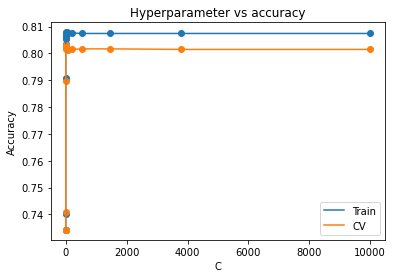

Train accuracy:  0.81
Training Error:  0.19 

Test accuracy:  0.8
Testing Error:  0.2 

Recall Score:  0.5
F-measure:  0.57


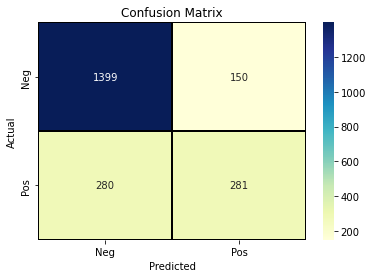

Fitting 5 folds for each of 30 candidates, totalling 150 fits

DecisionTreeClassifier
----------------------------------------------------------------------------------------------------
Best Parameter {'max_depth': 5, 'min_samples_split': 20}


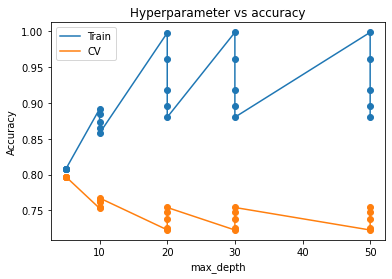

Train accuracy:  0.8
Training Error:  0.2 

Test accuracy:  0.78
Testing Error:  0.22 

Recall Score:  0.61
F-measure:  0.6


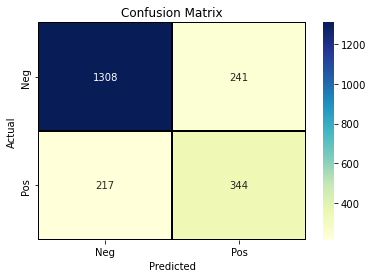

Fitting 5 folds for each of 20 candidates, totalling 100 fits

SVC
----------------------------------------------------------------------------------------------------
Best Parameter {'C': 1.623776739188721}


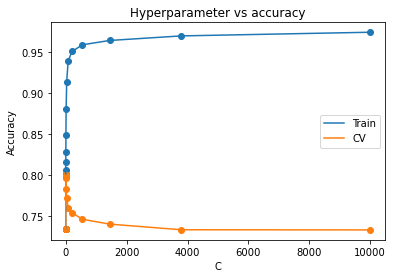

Train accuracy:  0.83
Training Error:  0.17 

Test accuracy:  0.79
Testing Error:  0.21 

Recall Score:  0.49
F-measure:  0.56


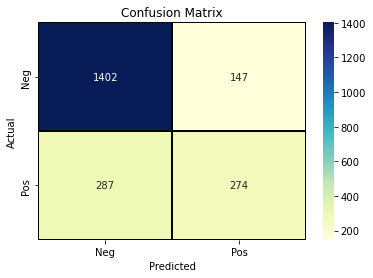

In [36]:
for model in models:
    clf = Classifier(model,X_train_final,y_train, X_test_final, y_test, 'Without Class Balancing')
    clf.algorithm()

<b> Observations: </b> 
- Train and test accuracy is High. But since data is imbalanced accuracy is correctly representing only the not churned class.
- The Recall for **`SVC`** is less than 0.5 which is not a good sign. 
- There is no significant difference between Fasle Negative and True positive. 
- Model is performing poorly on churned class.

<h3> 5.2 Apply Model with Class Balancing 
    
##### Data Balance using SMOTE

In [37]:
# oversampling of minority class with smote
print("count of the classes before oversampling: ",dict(y_train.value_counts()))
sm = SMOTE(sampling_strategy ='minority')
x_train_os,y_train_os = sm.fit_resample(X_train_final,y_train)
print("count of the classes after oversampling: ",dict(y_train_os.value_counts()))

count of the classes before oversampling:  {0: 3614, 1: 1308}
count of the classes after oversampling:  {0: 3614, 1: 3614}


In [38]:
models = [
    LogisticRegression(random_state=43),
    DecisionTreeClassifier(random_state = 42),
    SVC(random_state = 42)
]

Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\kawish.abbas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\kawish.abbas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres


LogisticRegression
----------------------------------------------------------------------------------------------------
Best Parameter {'C': 4.281332398719396}


C:\Users\kawish.abbas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


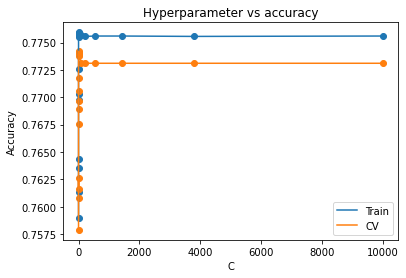

Train accuracy:  0.78
Training Error:  0.22 

Test accuracy:  0.75
Testing Error:  0.25 

Recall Score:  0.81
F-measure:  0.63


C:\Users\kawish.abbas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


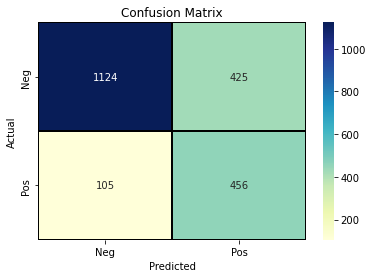

Fitting 5 folds for each of 30 candidates, totalling 150 fits

DecisionTreeClassifier
----------------------------------------------------------------------------------------------------
Best Parameter {'max_depth': 10, 'min_samples_split': 5}


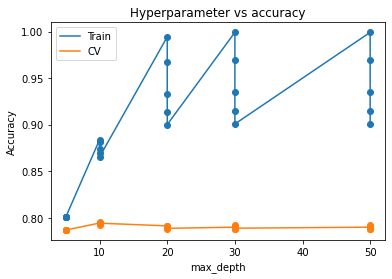

Train accuracy:  0.88
Training Error:  0.12 

Test accuracy:  0.73
Testing Error:  0.27 

Recall Score:  0.68
F-measure:  0.57


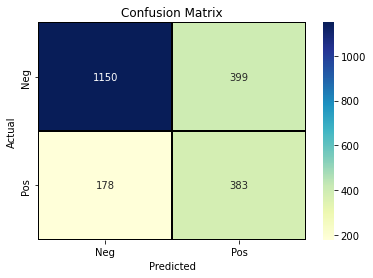

Fitting 5 folds for each of 20 candidates, totalling 100 fits

SVC
----------------------------------------------------------------------------------------------------
Best Parameter {'C': 29.763514416313132}


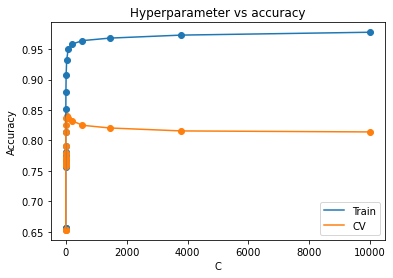

Train accuracy:  0.93
Training Error:  0.07 

Test accuracy:  0.75
Testing Error:  0.25 

Recall Score:  0.64
F-measure:  0.57


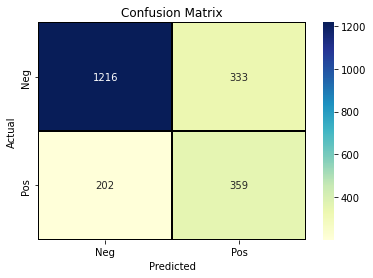

In [39]:
for model in models:
    clf = Classifier(model,x_train_os,y_train_os, X_test_final, y_test, 'Class Balancing by using SMOTE')
    clf.algorithm()

 <b> Observations: </b> 
- Train and test accuracy is slightly High.
- The Recall has improved after balancing class. 
- But the Model is still performing poorly on churned class.

<h3> 5.3 Ensemble Models

In [40]:
def EnsembleModels(model,parameters, x_train, y_train, x_test,y_test, balance):
  
    grid = GridSearchCV(estimator=model, param_grid=parameters,scoring='accuracy',return_train_score=True,verbose=1)
    grid.fit(x_train,y_train)
    cv_result = pd.DataFrame(grid.cv_results_).sort_values(by='mean_train_score',ascending=True)
    print()
    print(model.__class__.__name__, "------"*5, balance )
    print("-----"*20)
    print("Best Parameter", grid.best_params_)
   
    params = list(cv_result['params'].astype(str))
    
    plt.figure(figsize=(12,6))
    plt.scatter(params,cv_result['mean_train_score'])
    plt.plot(params,cv_result['mean_train_score'],label='Train')
    plt.scatter(params,cv_result['mean_test_score'])
    plt.plot(params,cv_result['mean_test_score'],label="CV")
    plt.title('Hyperparameter vs accuracy')
    plt.legend()
    plt.xlabel('Hyperparametr combination Dict')
    plt.xticks(rotation=90)
    plt.ylabel('Accuracy')
    plt.show()
    
    best_estimator(model.__class__.__name__,grid.best_estimator_,x_train, y_train, x_test,y_test, balance)
    
def best_estimator(model,best_estimator,x_train, y_train, x_test,y_test, balance):
    
    # Training the model again using the optimal parameters discovered
    best_estimator.fit(x_train,y_train)
    best_model.append({'best_model':best_estimator, 'Data Imbalance Status': balance})
    
    result = []
    y_pred_tr = best_estimator.predict(x_train)
    result.append(round(accuracy_score(y_train,y_pred_tr),2))
    print('Train accuracy: ',result[0])

    error = 1 - result[0]
    result.append(round(error,2))
    print("Training Error: ", result[1],'\n')

    y_pred_test = best_estimator.predict(x_test)
    result.append(round(accuracy_score(y_test,y_pred_test),2))
    print('Test accuracy: ',result[2])

    error = 1 - result[2]
    result.append(round(error,2))
    print("Testing Error: ", result[3],'\n')

    recall = recall_score(y_test,y_pred_test)
    result.append(round(recall,2))
    print("Recall Score: ",result[4])

    f_measure = f1_score(y_test, y_pred_test)
    result.append(round(f_measure,2))
    print("F-measure: ", result[5])

    models_data.append({'Model':model,'Train accuracy':result[0], 'Test accuracy':result[2],
                        'F-measure': result[5],'Data Imbalance Status': balance,'Recall Score': result[4]})
    
    cm = confusion_matrix(y_test,y_pred_test)
    ax=plt.subplot();
    sns.heatmap(cm, annot=True, fmt='d', linewidths=2, linecolor='black', cmap='YlGnBu',ax=ax)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    ax.set_ylim(2.0,0)
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['Neg','Pos'])
    ax.yaxis.set_ticklabels(['Neg','Pos'])
    plt.show()
    

<h4> 5.3.1 RandomForest and XGBoost

Fitting 5 folds for each of 25 candidates, totalling 125 fits

RandomForestClassifier ------------------------------ Class Balance by using weights
----------------------------------------------------------------------------------------------------
Best Parameter {'max_depth': 20, 'n_estimators': 500}


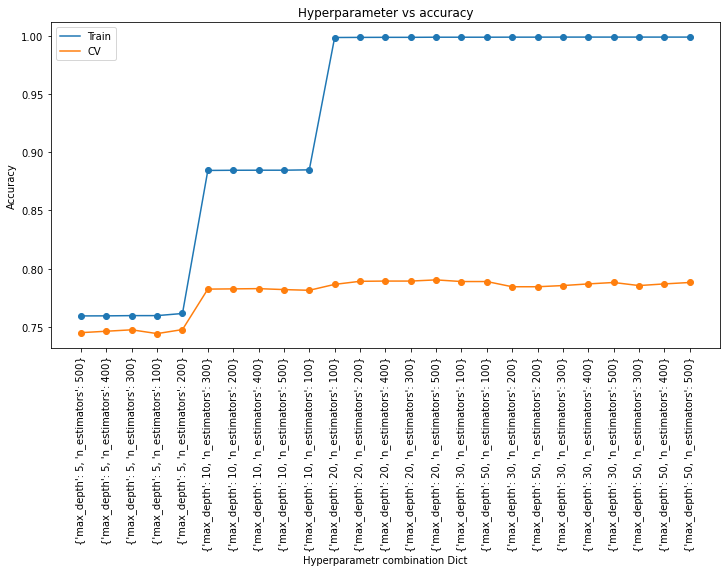

Train accuracy:  1.0
Training Error:  0.0 

Test accuracy:  0.78
Testing Error:  0.22 

Recall Score:  0.48
F-measure:  0.54


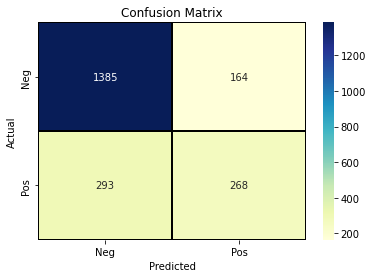

Fitting 5 folds for each of 25 candidates, totalling 125 fits

RandomForestClassifier ------------------------------ Class Balance by using SMOTE
----------------------------------------------------------------------------------------------------
Best Parameter {'max_depth': 20, 'n_estimators': 200}


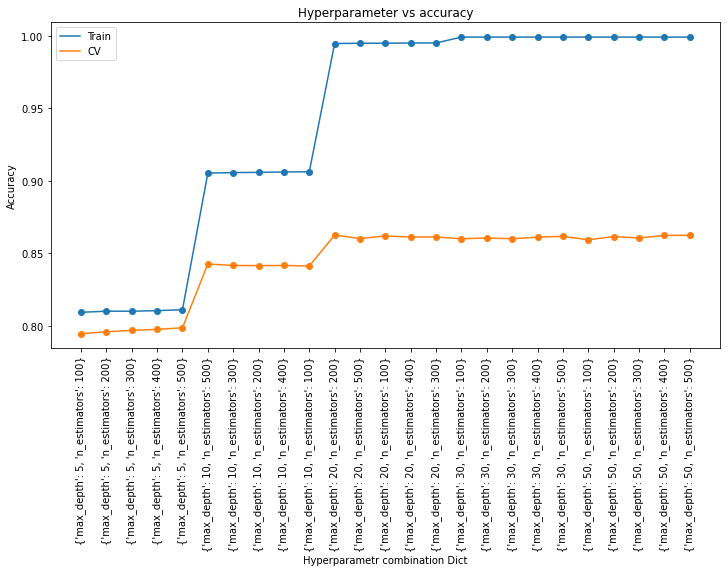

Train accuracy:  0.99
Training Error:  0.01 

Test accuracy:  0.77
Testing Error:  0.23 

Recall Score:  0.59
F-measure:  0.58


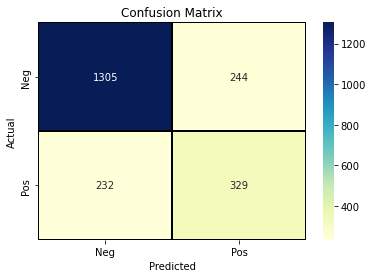

Fitting 5 folds for each of 144 candidates, totalling 720 fits

XGBClassifier ------------------------------ Class Balance by using weights
----------------------------------------------------------------------------------------------------
Best Parameter {'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


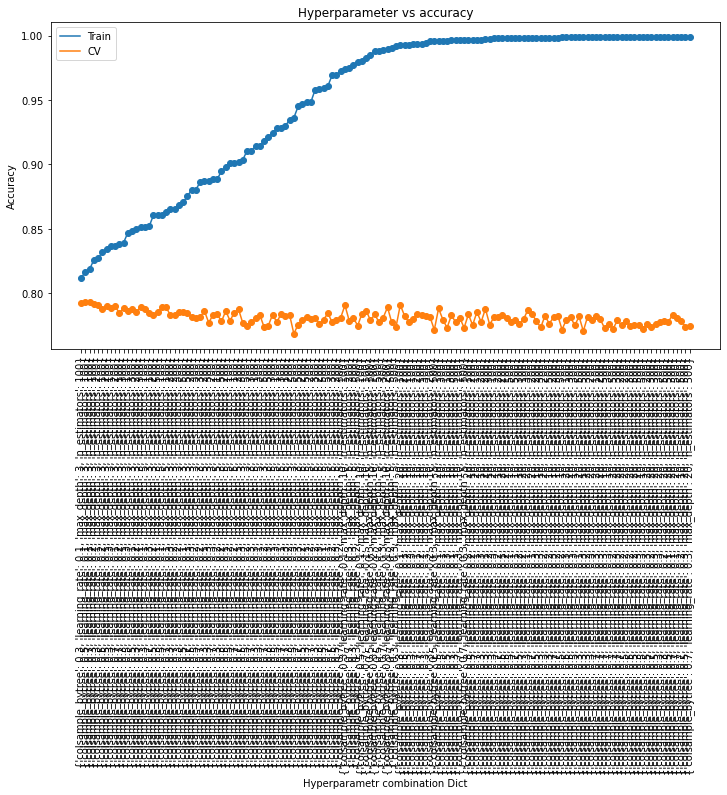

Train accuracy:  0.81
Training Error:  0.19 

Test accuracy:  0.78
Testing Error:  0.22 

Recall Score:  0.7
F-measure:  0.62


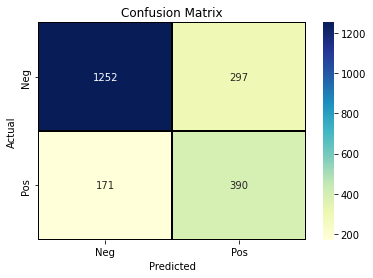

Fitting 5 folds for each of 144 candidates, totalling 720 fits

XGBClassifier ------------------------------ Class Balance by using SMOTE
----------------------------------------------------------------------------------------------------
Best Parameter {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 20, 'n_estimators': 100}


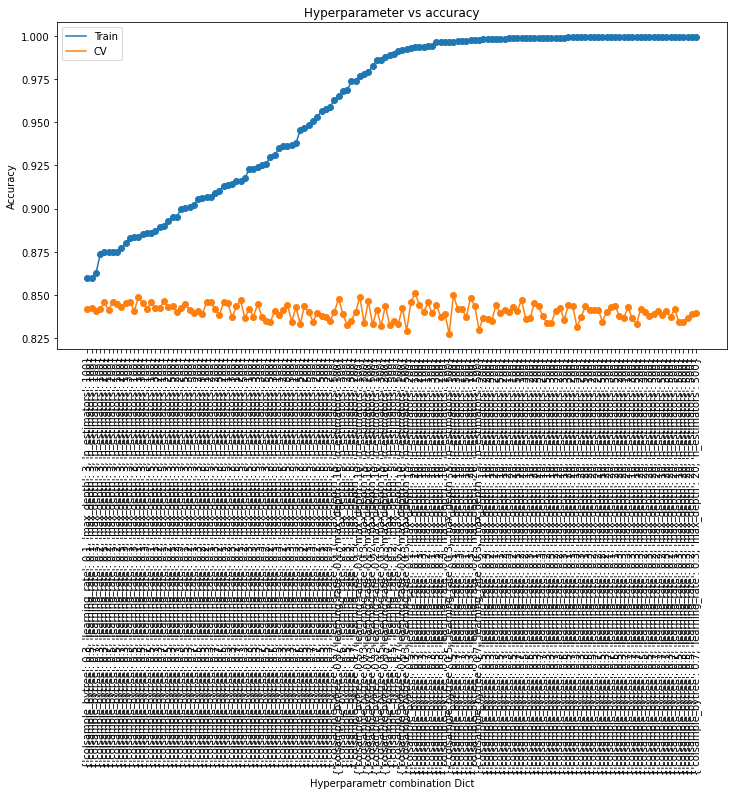

Train accuracy:  0.99
Training Error:  0.01 

Test accuracy:  0.76
Testing Error:  0.24 

Recall Score:  0.61
F-measure:  0.57


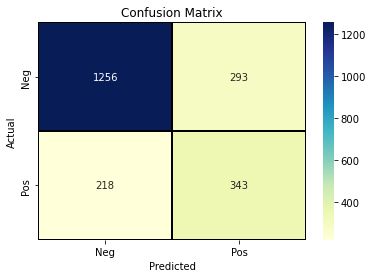

In [41]:
# create scale_pos_weight parameter used for class balancing in XgBoost
import math
scale=round(math.sqrt(y_train.value_counts()[0]/y_train.value_counts()[1]),2)

# Parameters for RandomForest (rf) and xgBoost
parameter_rf = {'max_depth':[5,10,20,30,50], 'n_estimators': [100,200,300,400,500]}
parameters_xgBoost = {"learning_rate"    : [0.10,0.20,0.30 ],\
              "max_depth"        : [ 3,5,10,20],\
              "n_estimators" : [ 100, 200, 300, 500],\
              "colsample_bytree" : [ 0.3, 0.5, 0.7 ] }

# RandomForest Classifier with class weight
clf_rf = RandomForestClassifier(class_weight='balanced',random_state=43)
# RandomForest Classifier without class weight
clf_rf1= RandomForestClassifier(random_state=43)  

# XGB Classifier (XGBoost) with scale_pos_wight
clf_xgb = XGBClassifier(scale_pos_weight=scale,eval_metric='mlogloss')
# XGB Classifier (XGBoost) without scale_pos_wight
clf_xgb1 = XGBClassifier(eval_metric='mlogloss')

#By using class weights
EnsembleModels(clf_rf,parameter_rf,X_train_final,y_train,X_test_final,y_test, 'Class Balance by using weights')
#By using SMOTE
EnsembleModels(clf_rf1,parameter_rf,x_train_os,y_train_os, X_test_final, y_test, 'Class Balance by using SMOTE')

# By using scale_pos_weight
EnsembleModels(clf_xgb,parameters_xgBoost,X_train_final,y_train,X_test_final,y_test, 'Class Balance by using weights')
#By using SMOTE
EnsembleModels(clf_xgb1,parameters_xgBoost,x_train_os,y_train_os, X_test_final, y_test, 'Class Balance by using SMOTE')

<h3> 5.4 Compare the Model Performance

In [42]:
table = PrettyTable()

table.field_names = ["S.No", "Model", "Data Imbalance Status", "Train accuracy", "Test accuracy", "F-measure", "Recall Score"]

for i, result in enumerate(models_data, start=1):
    table.add_row([
        i,
        result["Model"],
        result["Data Imbalance Status"],
        result["Train accuracy"],
        result["Test accuracy"],
        result["F-measure"],
        result["Recall Score"]
    ])

print(table)

+------+------------------------+--------------------------------+----------------+---------------+-----------+--------------+
| S.No |         Model          |     Data Imbalance Status      | Train accuracy | Test accuracy | F-measure | Recall Score |
+------+------------------------+--------------------------------+----------------+---------------+-----------+--------------+
|  1   |   LogisticRegression   |    Without Class Balancing     |      0.81      |      0.8      |    0.57   |     0.5      |
|  2   | DecisionTreeClassifier |    Without Class Balancing     |      0.8       |      0.78     |    0.6    |     0.61     |
|  3   |          SVC           |    Without Class Balancing     |      0.83      |      0.79     |    0.56   |     0.49     |
|  4   |   LogisticRegression   | Class Balancing by using SMOTE |      0.78      |      0.75     |    0.63   |     0.81     |
|  5   | DecisionTreeClassifier | Class Balancing by using SMOTE |      0.88      |      0.73     |    0.57   |

#### Let's se the best model

In [43]:
max_train_acc = max(models_data, key=lambda x: x['Train accuracy'])
max_test_acc = max(models_data, key=lambda x: x['Test accuracy'])
max_f_measure = max(models_data, key=lambda x: x['F-measure'])
max_recall_score = max(models_data, key=lambda x: x['Recall Score'])

max_models = [
    f"{max_train_acc['Model']} ({max_train_acc['Data Imbalance Status']})",
    f"{max_test_acc['Model']} ({max_test_acc['Data Imbalance Status']})",
    f"{max_f_measure['Model']} ({max_f_measure['Data Imbalance Status']})",
    f"{max_recall_score['Model']} ({max_recall_score['Data Imbalance Status']})"
]

print("Models with maximum metrics:")
for model in max_models:
    print(model)


Models with maximum metrics:
RandomForestClassifier (Class Balance by using weights)
LogisticRegression (Without Class Balancing)
LogisticRegression (Class Balancing by using SMOTE)
LogisticRegression (Class Balancing by using SMOTE)


<h2> 6. Test New Data to Final Model

#### Retrieve the estimated models 

In [51]:
for index, model in enumerate(best_model):
    print(f'{index}. {model["best_model"]} {model["Data Imbalance Status"]}')

0. LogisticRegression(C=0.012742749857031334, random_state=42) Without Class Balancing
1. DecisionTreeClassifier(max_depth=5, min_samples_split=20, random_state=42) Without Class Balancing
2. SVC(C=1.623776739188721, random_state=42) Without Class Balancing
3. LogisticRegression(C=4.281332398719396, random_state=43) Class Balancing by using SMOTE
4. DecisionTreeClassifier(max_depth=10, min_samples_split=5, random_state=42) Class Balancing by using SMOTE
5. SVC(C=29.763514416313132, random_state=42) Class Balancing by using SMOTE
6. RandomForestClassifier(class_weight='balanced', max_depth=20, n_estimators=500,
                       random_state=43) Class Balance by using weights
7. RandomForestClassifier(max_depth=20, n_estimators=200, random_state=43) Class Balance by using SMOTE
8. XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, early_stopping_rounds=None,
              enab

Based on the above models **`LogisticRegresson`** give best result as compared to other Models

In [56]:
final_model = best_model[3]['best_model']
final_model

LogisticRegression(C=4.281332398719396, random_state=43)

<h3> 6.1 Load New Data

In [129]:
file_path = '../data/testing_data.xlsx'

# Load the Excel file into a pandas DataFrame
df = pd.ExcelFile(file_path)
df.sheet_names

['With Label', 'Without Label']

In [130]:
s1 = df.parse('Without Label') 

In [131]:
print(s1.shape)
s1.head()

(1843, 20)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
1,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65
2,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50
3,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05
4,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30


<h3>6.2 Data Exploration

In [132]:
s1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1843 entries, 0 to 1842
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        1843 non-null   object 
 1   gender            1843 non-null   object 
 2   SeniorCitizen     1843 non-null   int64  
 3   Partner           1843 non-null   object 
 4   Dependents        1843 non-null   object 
 5   tenure            1843 non-null   int64  
 6   PhoneService      1843 non-null   object 
 7   MultipleLines     1843 non-null   object 
 8   InternetService   1843 non-null   object 
 9   OnlineSecurity    1843 non-null   object 
 10  OnlineBackup      1843 non-null   object 
 11  DeviceProtection  1843 non-null   object 
 12  TechSupport       1843 non-null   object 
 13  StreamingTV       1843 non-null   object 
 14  StreamingMovies   1843 non-null   object 
 15  Contract          1843 non-null   object 
 16  PaperlessBilling  1843 non-null   object 


In [133]:
# Check if data is null
s1.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [134]:
# Check the duplication
s1.duplicated().sum()

0

In [106]:
# convert columns to categoris
cat_col = ["gender", "Partner", "Dependents", "PhoneService", "MultipleLines", "InternetService", "OnlineSecurity",
               "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "Contract",
               "PaperlessBilling", "PaymentMethod"]

In [107]:
for col in cat_col:
    s1[col] = s1[col].astype("category")

<h3> 6.3 Data Cleaning

In [108]:
# Drop customer ID 
s1.drop("customerID", axis=1, inplace=True)

In [110]:
print(s1.shape)
s1.info()

(1843, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1843 entries, 0 to 1842
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            1843 non-null   category
 1   SeniorCitizen     1843 non-null   int64   
 2   Partner           1843 non-null   category
 3   Dependents        1843 non-null   category
 4   tenure            1843 non-null   int64   
 5   PhoneService      1843 non-null   category
 6   MultipleLines     1843 non-null   category
 7   InternetService   1843 non-null   category
 8   OnlineSecurity    1843 non-null   category
 9   OnlineBackup      1843 non-null   category
 10  DeviceProtection  1843 non-null   category
 11  TechSupport       1843 non-null   category
 12  StreamingTV       1843 non-null   category
 13  StreamingMovies   1843 non-null   category
 14  Contract          1843 non-null   category
 15  PaperlessBilling  1843 non-null   category
 16  PaymentMethod

<h4> Encoding

In [ ]:
encoder = OneHotEncoder()

<h4> PipeLine

In [115]:
cat_imputer = SimpleImputer(strategy = "most_frequent")
num_imputer = SimpleImputer(strategy = "median")

In [116]:
cat = Pipeline([
    ("cat_imputer", cat_imputer),
    ("end", encoder)
])

num = Pipeline([
    ("num_imputer", num_imputer),
    ("scaler", StandardScaler()),
])

In [117]:
cleaning = ColumnTransformer([
    ("num", num, num_columns),
    ("cat", cat, cat_columns),
], remainder = "passthrough")
final_test = cleaning.fit_transform(s1)

<h3> 6.4 Predict Labels on new Data

In [123]:
binary_predictions  = final_model.predict(final_test)

In [125]:
label_mapping = {1: "YES", 0: "NO"}
converted_predictions = [label_mapping[prediction] for prediction in binary_predictions]

In [126]:
s1['churn'] = converted_predictions

In [127]:
s1.to_excel('../data/labeled_data.xlsx', index=False)